## Downloading historical stock data
The key library used to download historical stock datain this applciation is the pandas_datareader. You can read more at [github.com/pydata/pandas-datareader](https://github.com/pydata/pandas-datareader)

In [44]:
#import relevant libraries
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

# Plot formatting
%matplotlib inline 
style.use('ggplot')

In [47]:
# download data from Jan, 2010 to Jan 2020
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2020, 1, 1)

df = web.DataReader('TSLA', 'yahoo', start, end)
print(df.head())

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


### Results:

1. High: The highest price of the security on the giving day
2. Low : The lowest price of the security on a given day 
3. Open: The price at which a security first trades upon the opening of an exchange on a trading day. [Investopedia](https://www.investopedia.com/terms/o/openingprice.asp)
4. Close: The price the secuirty sold last before the market closed on the given day
5. Volume: The enumber of units of the stock that was traded on the given day
6. Adj Close: The adjusted closing price factors in anything that might affect the stock price after the market closed [Investopedia](https://www.investopedia.com/terms/a/adjusted_closing_price.asp) 

### Function to donload Stock data

In [54]:
# Get stock data 
def get_stock_data(symbol, start=dt.datetime(2010, 1, 1), end=dt.datetime(2020, 1, 1)):
    '''
    download stock data over from yahoo api form start date to end date
    input
        stock - String representing stock symbol eg APPL
        start - datetime object represent start date; default Jan 1, 2010
        end - datetime object represent end date; default: Jan 1, 2020
    output
        historical stock data pulled from yahoo finance stock api from start to end dates
    '''
    stockData = web.DataReader(symbol, 'yahoo', start, end)
    
    return stockData

In [56]:
df_GOOG = get_stock_data('GOOG')
print(df_GOOG.head(5))

                  High         Low        Open       Close      Volume  \
Date                                                                     
2010-01-04  313.579620  310.954468  312.304413  312.204773   3927000.0   
2010-01-05  312.747742  309.609497  312.418976  310.829926   6031900.0   
2010-01-06  311.761444  302.047852  311.761444  302.994293   7987100.0   
2010-01-07  303.861053  295.218445  303.562164  295.940735  12876600.0   
2010-01-08  300.498657  293.455048  294.894653  299.885956   9483900.0   

             Adj Close  
Date                    
2010-01-04  312.204773  
2010-01-05  310.829926  
2010-01-06  302.994293  
2010-01-07  295.940735  
2010-01-08  299.885956  


### Plotting historical stock data

In [57]:
def plot_df(df, col, title=None):
    '''
    plot stock information
    input: 
        df - pandas dataframe containing historical stock information 
        col - array of strings: column names in df to plot
        title - title of plot.
    output: None
    '''
    fontsize=16
    if title == None:
        title = 'Daily '
        for c_name in col:
            title += c_name+'-'
        title = title[:-1]+' Prices'
        
    df[col].plot(figsize=(20,8), fontsize=fontsize);
    plt.title(title, fontsize=fontsize+4)
    plt.ylabel("price", fontsize=fontsize+4)
    plt.xlabel("date", fontsize=fontsize+4)
    plt.show()

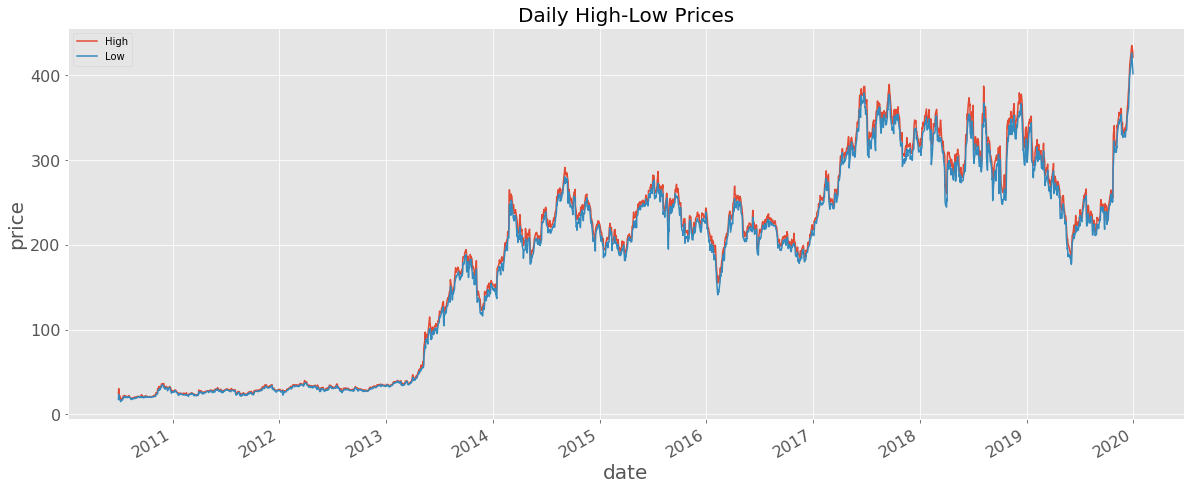

In [49]:
plot_df(df, ['High','Low'])

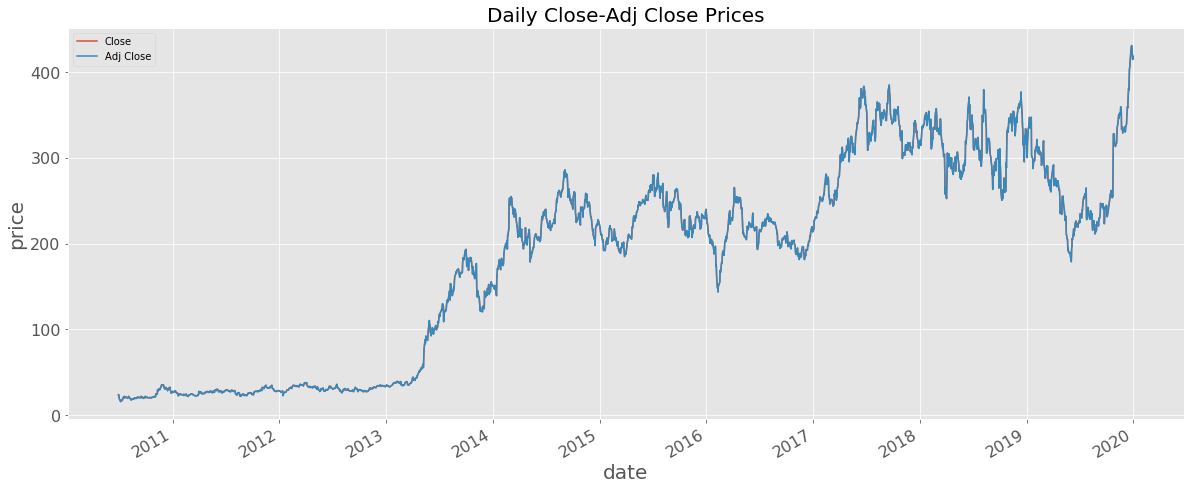

In [50]:
plot_df(df, ['Close','Adj Close'], )

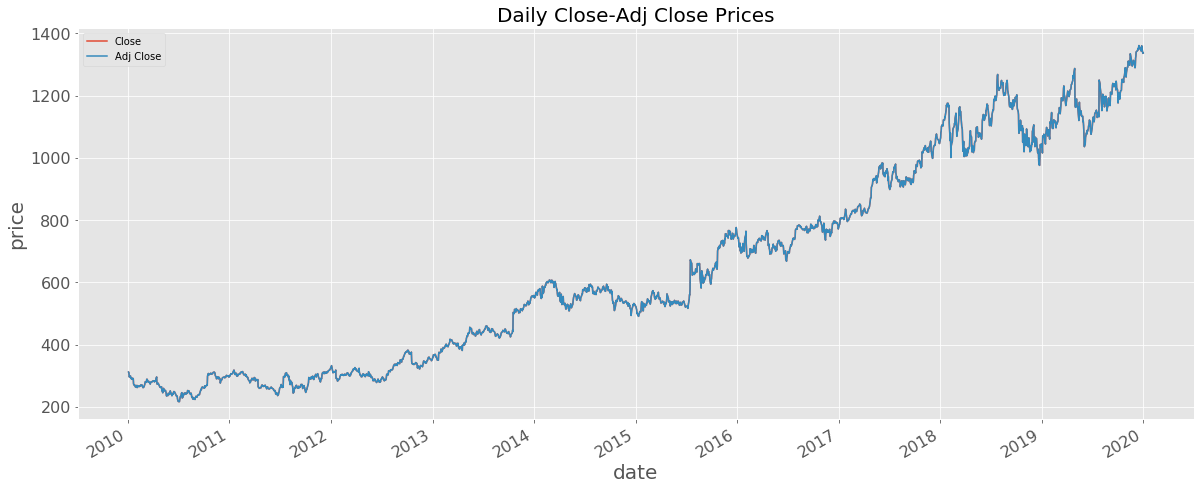

In [58]:
plot_df(df_GOOG, ['Close','Adj Close'])